# Antes de entrenar un modelo, es necesario saber el funcionamiento y la API se scikit-learn


In [0]:
import numpy as np
import pandas as pd

> Scikit-learn es la librería más usada de Machine Learning tradicional [Ver ranking de Github](https://github.com/showcases/machine-learning). La librería incluye funcionalidades de:
- Preprocesamiento de datos en  `sklearn.preprocessing` 
- Algoritmos de Machine Learning en `sklearn.linear_model`, `sklearn.svm`, `sklearn.ensemble`, y muchos más.
- Evaluación de modelos en `sklearn.model_selection` y `sklearn.metrics`

Scikit-learn sigue muy de cerca los resultados de la investigación e implementa los resultados más maduros y probados en sus modulos. La [documentación](http://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees) extensa muestra como la librería es un compendio de conocimiento en Machine Learning llevado a software

---
*Una estructura de datos esencial en scikit-learn es el Estimator*

---

![Estimador](https://github.com/JuanPabloMF/machine-learning-platzi/raw/8c90f12d2f94ba2b58d725d2eb232a8d654cfc22/img/estimator.png)

![Flujo de evaluación](https://github.com/JuanPabloMF/machine-learning-platzi/blob/master/img/evaluation_flow.png?raw=true)

----

![Mapa de Modelos de Machibe learning](https://github.com/JuanPabloMF/machine-learning-platzi/blob/master/img/ml_map.png?raw=true)

# Implementemos un modelo simple de regresión primero

In [0]:
X = pd.read_csv('drive/My Drive/Colab Notebooks/datasets/machine_learning_python/intermediate_results/X.csv')

In [0]:
y = X['worldwide_gross']

In [0]:
X = X.drop('worldwide_gross', axis=1)

In [0]:
# Importamos SckitLearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=11)

In [24]:
print(len(X))
print(len(X_train))
print(len(X_test))

4104
2462
1642


In [25]:
X.head(1)

,production_budget,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score,gross
0,425000000.0,2009.0,1.78,178.0,4834.0,237000000.0,7.9,760505847.0


In [0]:
# Implementación del Modelo usando una regresión lasso
from sklearn.linear_model import Lasso

# Se instancia el modelo Lasso
model = Lasso()

In [27]:
model.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [0]:
predicted = model.predict(X_test)

In [29]:
predicted.shape

(1642,)

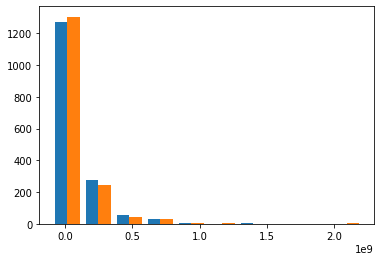

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist([predicted, y_test]);

# Evaluemos de forma más fina el comportamiento de nuestro modelo

Los estimadores y las funciones de sklearn vienen con el máximo de argumentos con valores por defecto que suelen ser las mejores opciones si no tenemos algun conocimiento particular el problema. En este caso particular la función `estimator.score` ya viene con una de las métricas de `sklearn.metrics`, que es la métrica `sklearn.metric.r2_score`

> El score **R2** de una regresión es una de las formas más comunes de entender su poder predictivo. Este **_mientras más cerca de 1 este, mejor es_**

> Los valores que puede tomar son de -infinito hasta 1. Un score R2 negativo es malo, ya que esto indica que la regresión es peor que si simplemente eligieramos un valor fijo como predicción para todos los puntos, la media.

In [31]:
model.score(X_test, y_test)

0.8149257769549056

Bastante bien para un primer modelo!

Un buen score R2 es importante para una regresión. Pero no lo es todo. De forma general los scores hay que complementarlos con visualizaciones de los datos ya que una métrica no logra siempre encodear todas las caracteristicas de una distribución de probabilidades. Un ejemplo es el siguiente:

![Datasaurus Dozen](https://github.com/JuanPabloMF/machine-learning-platzi/blob/master/img/datasaurus_dozen.png?raw=true)

> **Siempre visualiza tus resultados**, aunque tengas un buen score de performance.

In [0]:
# Los residuales son la diferencia entre la predicción y el valor real
residuals = y_test - predicted

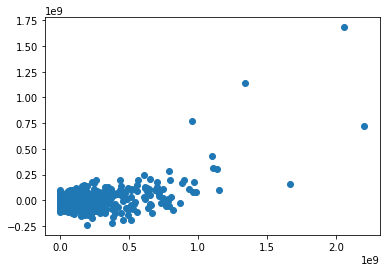

In [33]:
plt.scatter(y_test, residuals)

In [0]:
# Normalizamos los datos usando los valores absolutos
ap_residuals = np.abs(residuals) / y_test

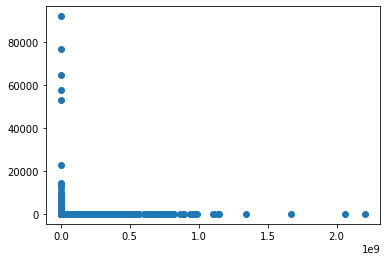

In [35]:
plt.scatter(y_test, ap_residuals)

In [0]:
# Usamos una escala logarítmica
lap_residuals = np.log(ap_residuals)

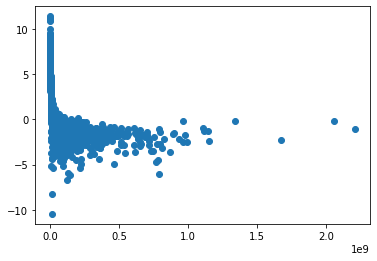

In [37]:
plt.scatter(y_test, lap_residuals)

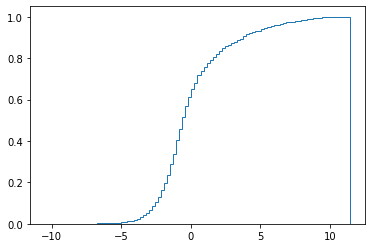

In [44]:
# Evaluación numérica de los erroes
plt.hist(lap_residuals, bins=100, density=1, histtype='step', cumulative=True);

array([0.13533528, 0.22313016, 0.36787944, 0.60653066, 1.        ])

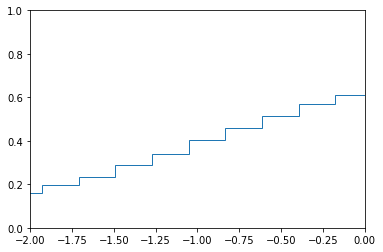

In [45]:
# Hacemos zooom a los datps
plt.hist(lap_residuals, bins=100, density=1, histtype='step', cumulative=True);
plt.axis([-2, 0, 0, 1])
np.power(np.exp(1)*np.ones(5), np.linspace(-2, 0, 5))